# Classification Intro with K Nearest Neighbors , p13

# Applying K Nearest Neighbors to Data , p14

To exemplify classification, we're going to use a Breast Cancer Dataset, which is a dataset donated to the University of California, Irvine (UCI) collection from the University of Wisconsin-Madison. UCI has a large Machine Learning Repository. The datasets here are organized by types of machine learning often used for them, data types, attribute types, topic areas, and a few others.

In [82]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd
#import numpy.ndarray as npn

In [24]:
df=pd.read_csv('breast-cancer-wisconsin.txt',error_bad_lines=False)
df.replace('?',-9999, inplace=True) # bad data make seperting from other data
df.drop(['id'],1,inplace=True) # remove id, beacuse we want to decreses volume of datas and we dont need a id.

In [32]:
# now, describe x for features and y for label ... 
x = np.array(df.drop(['class'],1)) #freatures
y = np.array(df['class']) #lebal

x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.20)

In [34]:
# Select and describe the machine learing ...
clf = neighbors.KNeighborsClassifier( )  # 1. Select mdoel

clf.fit(x_train, y_train)   # 2. fit data

accuracy = clf.score(x_test, y_test) # 3. calculate accuracy 
print(accuracy) # accurac < .95 isn't good

0.992857142857


In [ ]:
# if use id columan of data , the accuracy decrese a lot, so it is better that we don't use id


In [46]:
example_measure = np.array([4,2,2,3,1,1,1,1,9])

example_measure = example_measure.reshape(1,-1) # I don't understand it

perdication = clf.predict(example_measure)
print(perdication)

[2]


In [57]:
example_measure = np.array([[40,2,2,3,100,100,1,1,9],[5,1,1,1,2,1,3,1,1]])

example_measure = example_measure.reshape(2,-1) # I don't understand it

perdication = clf.predict(example_measure)
print(perdication)

[4 2]


In [48]:
#help(example_measure.reshape(1,-1))

In [58]:
#df.head(12)

# Euclidean Distance theory, p15

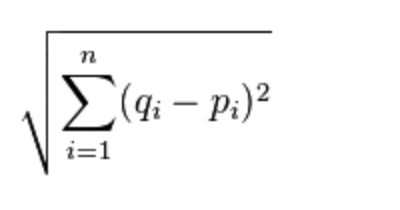

In [59]:
from IPython.display import Image
Image(filename='3.png', width=340,height=340)

# Creating a K Nearest Neighbors Classifer from scratch, p16, p17

In [83]:
import numpy as np
from math  import sqrt
import matplotlib.pyplot as plt
from matplotlib import style

from collections import Counter
import warnings   # it warn user when use dumb number for k

%matplotlib inline
style.use('fivethirtyeight')

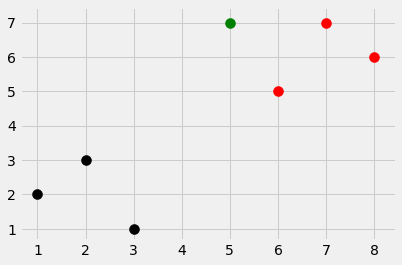

In [75]:

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]} 
# we have two class here with three feature for each of them

new_features = [5,7] # we use machine learing and see this new point belongs to each gruops, k or r... 

[[plt.scatter(j[0],j[1], s=100 ,color=i) for j in dataset[i]] for i in dataset]

plt.scatter(new_features[0],new_features[1], s=100 , color='g')  
plt.show()

In [76]:
def K_NEARST_NEIGHBORS(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result


result = K_NEARST_NEIGHBORS(dataset, new_features)
print(result)

r


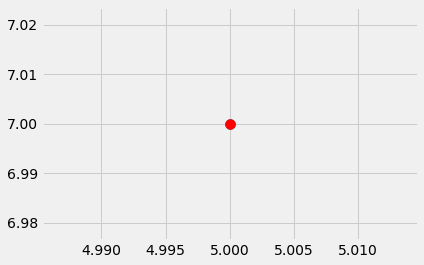

In [78]:
plt.scatter(new_features[0], new_features[1], s=100)

result = K_NEARST_NEIGHBORS(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

# >>> Testing our K Nearest Neighbors classifier, p18

In [79]:
import random

In [96]:
df=pd.read_csv('breast-cancer-wisconsin.txt',error_bad_lines=False)
#print(df.head())
df.replace('?',-9999, inplace=True) # bad data make seperting from other data
df.drop(['id'],1,inplace=True) # remove id, beacuse we want to decreses volume of datas and we dont need a id.

full_data = df.astype(float).values.tolist() 
# convert the data to a list of lists Note that we're explicitly converting the entire dataframe to float. 

random.shuffle(full_data)


[[1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [4.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 4.0, 3.0, 1.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [3.0, 1.0, 4.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 1.0, 1.0, 6.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0], [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [2.0, 3.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 2.0], [1.0, 1.0, 4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 7.0, 4.0, 1.0, 6.0, 1.0, 7.0, 10.0, 3.0, 4.0], [3.0, 1.0,

In [97]:
test_size = 0.20
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1]) 
    
for i in test_data:
    test_set[i[-1]].append(i[:-1]) 
    
correct = 0
total = 0 

for group in test_set:
    for data in test_set[group]:
        vote = K_NEARST_NEIGHBORS(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy = ', correct/total)

            

Accuracy =  0.9568345323741008


# P19

we talking about k accuracy and perdication.
if incersies the k , accuracy appear more worse

In [102]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
  
    return vote_result, confidence


df = pd.read_csv("breast-cancer-wisconsin.txt")
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

test_size = 0.4
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print('confidence = ',confidence)
        total += 1
print('Accuracy:', correct/total)

confidence =  1.0
confidence =  1.0
confidence =  1.0
confidence =  1.0
confidence =  1.0
confidence =  0.8
confidence =  0.8
confidence =  0.8
confidence =  1.0
Accuracy: 0.967741935483871
